In [1]:
pip install pandas scikit-learn xgboost matplotlib seaborn


     ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
     ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:59
     ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:36
     ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:21
     ---------------------------------------- 0.4/124.9 MB 2.0 MB/s eta 0:01:02
     ---------------------------------------- 0.4/124.9 MB 2.0 MB/s eta 0:01:02
     ---------------------------------------- 0.6/124.9 MB 1.8 MB/s eta 0:01:09
     ---------------------------------------- 0.8/124.9 MB 2.2 MB/s eta 0:00:56
     ---------------------------------------- 1.2/124.9 MB 2.8 MB/s eta 0:00:44
     ---------------------------------------- 1.4/124.9 MB 2.9 MB/s eta 0:00:42
      --------------------------------------- 1.6/124.9 MB 3.2 MB/s eta 0:00:39
      --------------------------------------- 2


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\akshi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
data=pd.read_csv('preprocess.csv')

C:\Users\akshi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



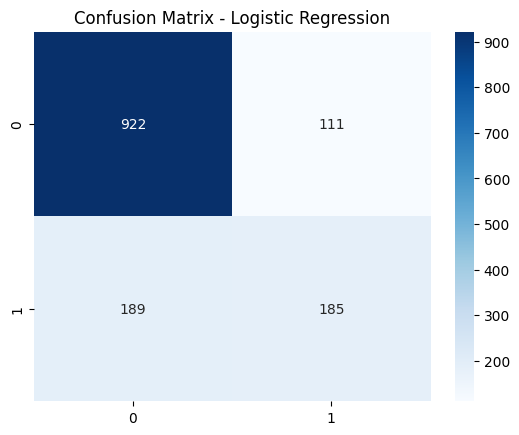

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


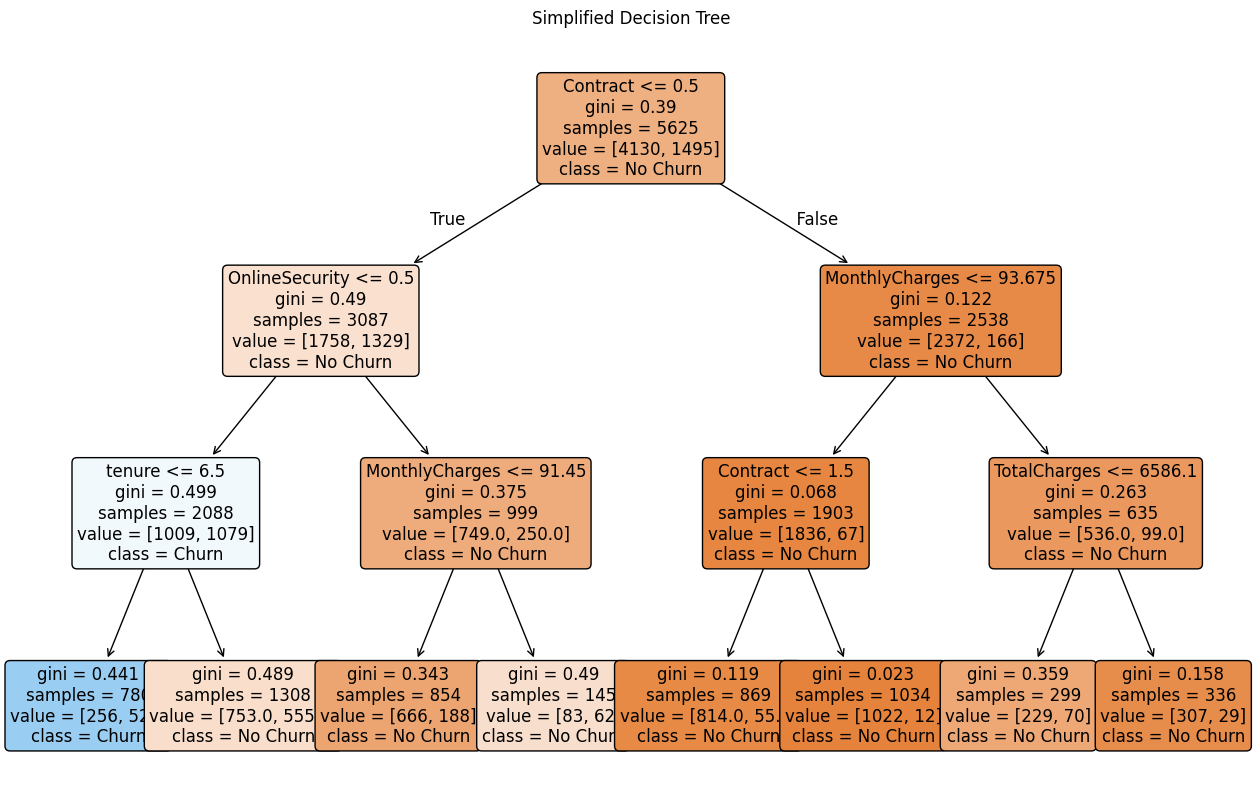

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model with controlled depth
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth to make it simpler
dtree.fit(X_train, y_train)

# Plotting the simplified decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    dtree, 
    feature_names=X.columns, 
    class_names=['No Churn', 'Churn'], 
    filled=True, 
    rounded=True, 
    fontsize=12
)
plt.title("Simplified Decision Tree")
plt.show()


Random Forest Accuracy: 0.7924662402274343
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



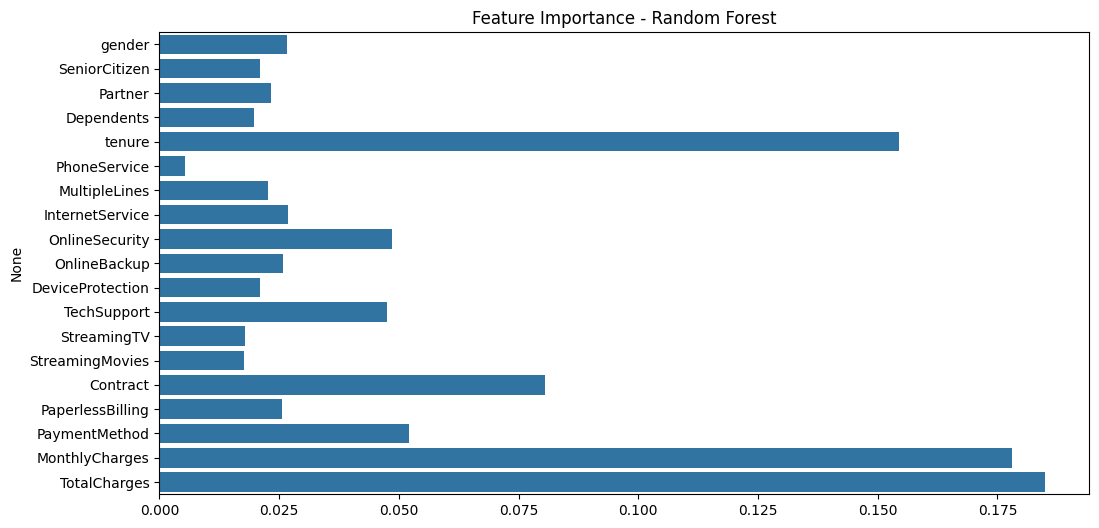

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()


C:\Users\akshi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [10:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7775408670931059
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



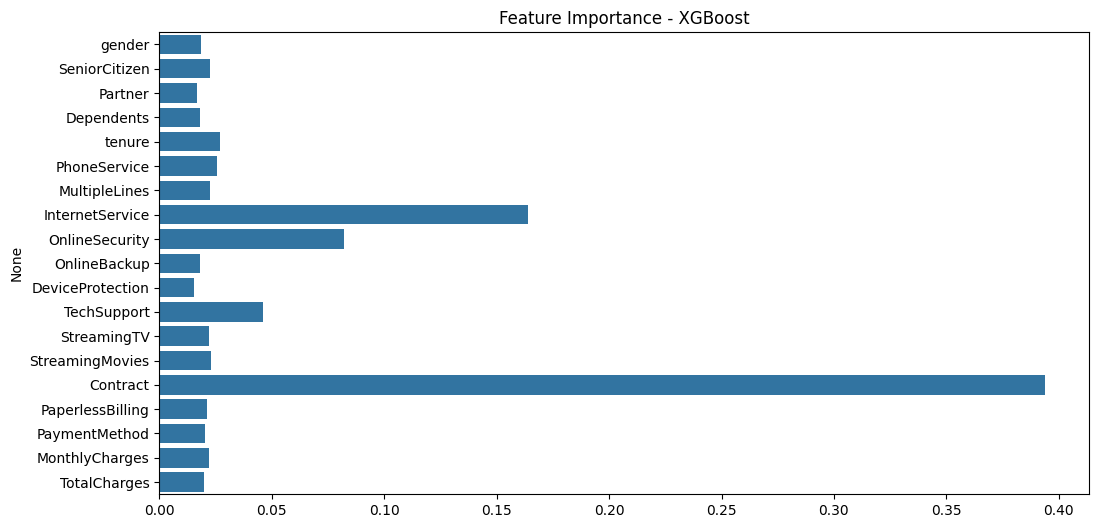

In [9]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=xgb.feature_importances_, y=features)
plt.title('Feature Importance - XGBoost')
plt.show()
